<a href="https://colab.research.google.com/github/juheesun/-/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [50]:
df = pd.read_csv("./hotel_bookings.csv")

In [51]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [52]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [53]:
df.isnull().sum().sort_values(ascending=False).head(20)

,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


In [54]:
df=pd.get_dummies(df)

In [55]:
df=df.fillna(df.mean())

In [56]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reservation_status_date_2017-09-03,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14
0,0,342,2015,27,1,0,0,2,0.0,0,...,False,False,False,False,False,False,False,False,False,False
1,0,737,2015,27,1,0,0,2,0.0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,7,2015,27,1,0,1,1,0.0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,13,2015,27,1,0,1,1,0.0,0,...,False,False,False,False,False,False,False,False,False,False
4,0,14,2015,27,1,0,2,2,0.0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,...,False,False,False,True,False,False,False,False,False,False
119386,0,102,2017,35,31,2,5,3,0.0,0,...,False,False,False,False,True,False,False,False,False,False
119387,0,34,2017,35,31,2,5,2,0.0,0,...,False,False,False,False,True,False,False,False,False,False
119388,0,109,2017,35,31,2,5,2,0.0,0,...,False,False,False,False,True,False,False,False,False,False


In [57]:
df.isnull().sum().sort_values(ascending=False).head(20)

,0
reservation_status_date_2017-09-14,0
is_canceled,0
lead_time,0
reservation_status_date_2017-08-27,0
reservation_status_date_2017-08-26,0
reservation_status_date_2017-08-25,0
reservation_status_date_2017-08-24,0
reservation_status_date_2017-08-23,0
reservation_status_date_2017-08-22,0
reservation_status_date_2017-08-21,0


In [58]:
df_corr=df.corr()
df_corr_sort=df_corr.sort_values('is_canceled', ascending=False)
df_corr_sort['is_canceled'].head(10)

,is_canceled
is_canceled,1.000000
reservation_status_Canceled,0.978435
deposit_type_Non Refund,0.481457
country_PRT,0.336122
lead_time,0.293123
market_segment_Groups,0.221859
assigned_room_type_A,0.197187
distribution_channel_TA/TO,0.175944
hotel_City Hotel,0.136531
customer_type_Transient,0.133084


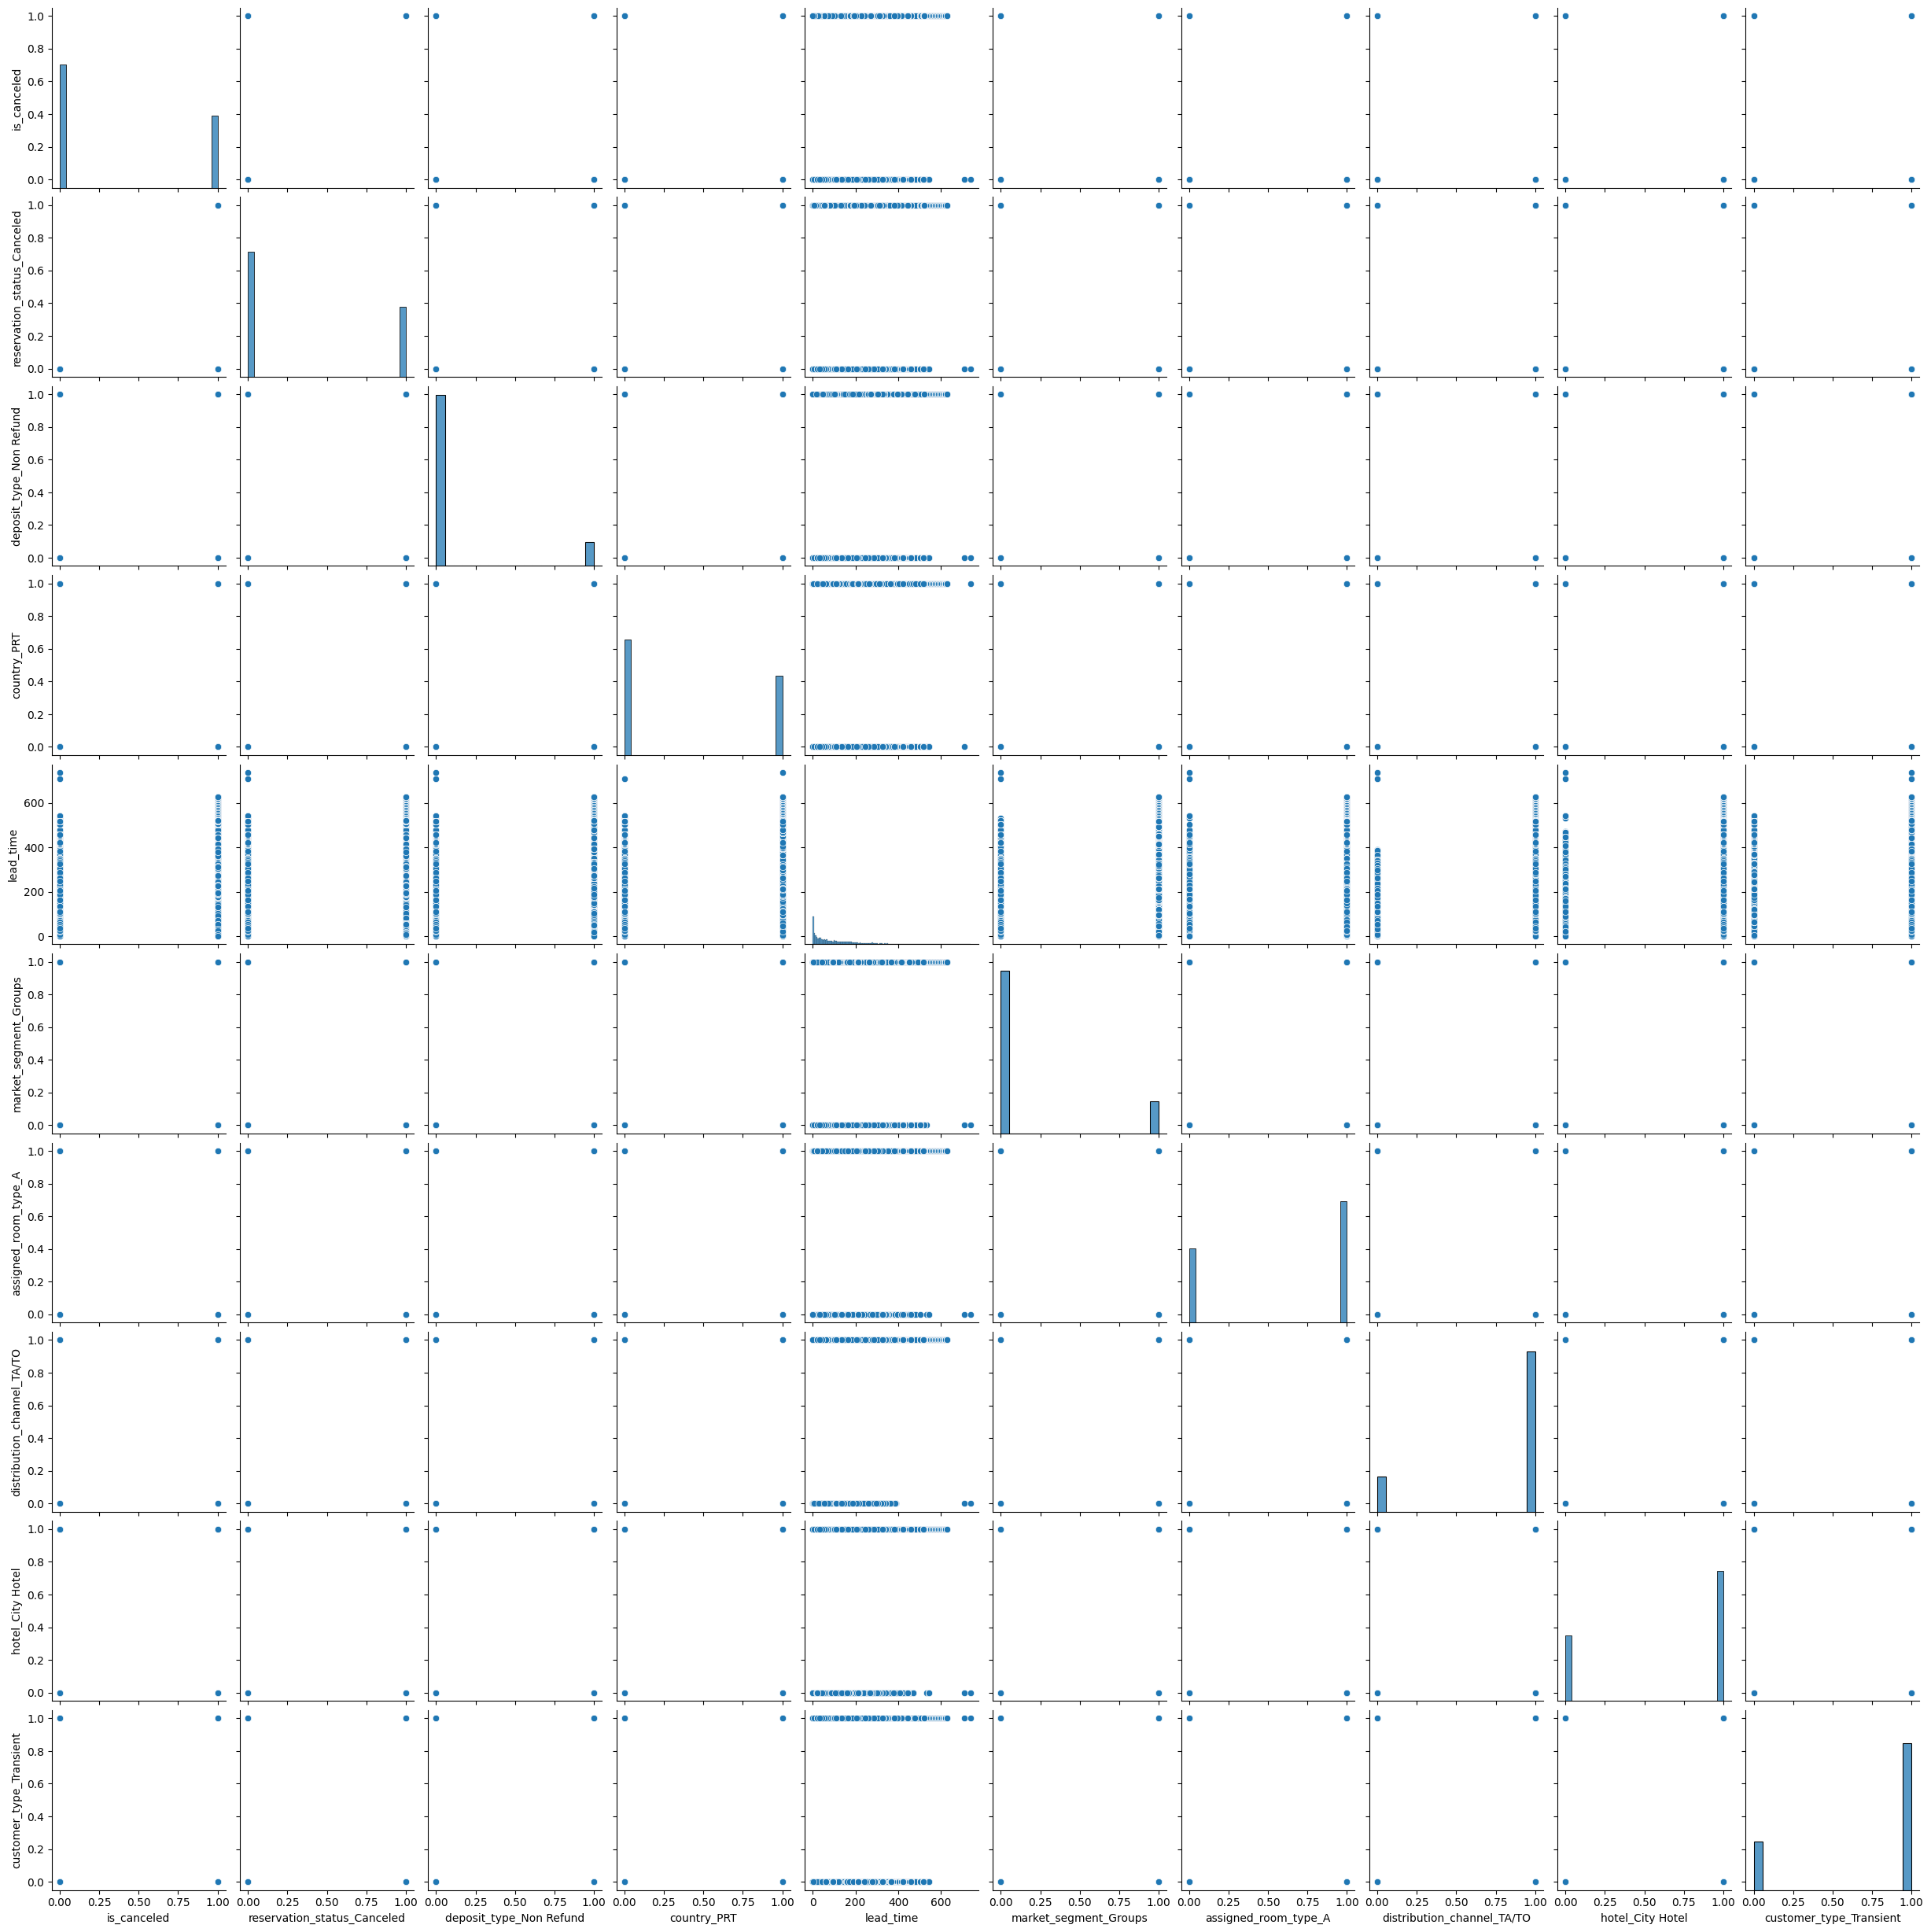

In [59]:
cols = ['is_canceled', 'reservation_status_Canceled', 'deposit_type_Non Refund', 'country_PRT', 'lead_time',
        'market_segment_Groups', 'assigned_room_type_A', 'distribution_channel_TA/TO', 'hotel_City Hotel', 'customer_type_Transient']

sns.pairplot(df[cols])
plt.show()

In [60]:
cols_train = ['reservation_status_Canceled', 'deposit_type_Non Refund', 'country_PRT', 'lead_time',
        'market_segment_Groups', 'assigned_room_type_A', 'distribution_channel_TA/TO', 'hotel_City Hotel', 'customer_type_Transient']

X_train_pre = df[cols_train]
y=df['is_canceled'].values

X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [61]:
model=Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 40)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,711 (6.68 KB)

 Trainable params: 1,711 (6.68 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [86]:
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=20)

In [87]:
modelpath = "/content/hotel_model.keras"

In [88]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [89]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [90]:
history=model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1392 - val_loss: 0.0127
Epoch 2/2000
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0165 - val_loss: 0.0124
Epoch 3/2000
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0247 - val_loss: 0.0104
Epoch 4/2000
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0137 - val_loss: 0.0112
Epoch 5/2000
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0123 - val_loss: 0.0108
Epoch 6/2000
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0122 - val_loss: 0.0115
Epoch 7/2000
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0131 - val_loss: 0.0102
Epoch 8/2000
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0118 - val_loss: 0.0122
Epoch 9/2000
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0104 - val_loss: 0.0103
Epoch 10/2000
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0113 - val_loss: 0.0102
Epoch 11/2000
2239/2239 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0095 - val_loss: 0.0103
Epoch 12

In [93]:
real_values = []
pred_values = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()

for i in range(25):
  real = y_test[i]
  prediction = Y_prediction[i]
  print("실제취소: {:,.2f}, 예상취소: {:,.2f}".format(real, prediction))
  real_values.append(real)
  pred_values.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step
실제취소: 1.00, 예상취소: 1.00
실제취소: 1.00, 예상취소: 1.00
실제취소: 0.00, 예상취소: 0.01
실제취소: 0.00, 예상취소: 0.01
실제취소: 0.00, 예상취소: 0.02
실제취소: 0.00, 예상취소: 0.02
실제취소: 0.00, 예상취소: 0.01
실제취소: 0.00, 예상취소: 0.01
실제취소: 1.00, 예상취소: 1.00
실제취소: 0.00, 예상취소: 0.01
실제취소: 1.00, 예상취소: 1.00
실제취소: 0.00, 예상취소: 0.04
실제취소: 0.00, 예상취소: 0.02
실제취소: 0.00, 예상취소: 0.06
실제취소: 0.00, 예상취소: 0.02
실제취소: 0.00, 예상취소: 0.11
실제취소: 0.00, 예상취소: 0.04
실제취소: 1.00, 예상취소: 0.99
실제취소: 1.00, 예상취소: 1.00
실제취소: 0.00, 예상취소: 0.02
실제취소: 0.00, 예상취소: 0.02
실제취소: 1.00, 예상취소: 1.00
실제취소: 1.00, 예상취소: 0.99
실제취소: 1.00, 예상취소: 1.00
실제취소: 0.00, 예상취소: 0.03


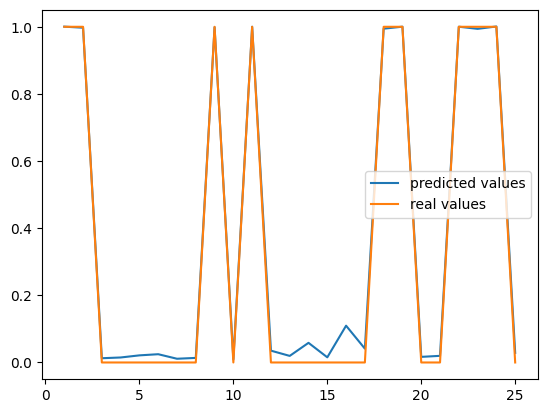

In [94]:
plt.plot(X_num, pred_values, label='predicted values')
plt.plot(X_num, real_values, label='real values')
plt.legend()
plt.show()